In [281]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [282]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Exploratory Data Analysis

In [283]:
df.shape

(10000, 18)

In [284]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [285]:
for i in df.columns:
    print(f"{i} column has {df[i].nunique()} unique values\n")

RowNumber column has 10000 unique values

CustomerId column has 10000 unique values

Surname column has 2932 unique values

CreditScore column has 460 unique values

Geography column has 3 unique values

Gender column has 2 unique values

Age column has 70 unique values

Tenure column has 11 unique values

Balance column has 6382 unique values

NumOfProducts column has 4 unique values

HasCrCard column has 2 unique values

IsActiveMember column has 2 unique values

EstimatedSalary column has 9999 unique values

Exited column has 2 unique values

Complain column has 2 unique values

Satisfaction Score column has 5 unique values

Card Type column has 4 unique values

Point Earned column has 785 unique values



In [286]:
# Checking the numerical features
df.select_dtypes("int")

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,1,1,1,1,1,2,464
1,2,15647311,608,41,1,1,0,1,0,1,3,456
2,3,15619304,502,42,8,3,1,0,1,1,3,377
3,4,15701354,699,39,1,2,0,0,0,0,5,350
4,5,15737888,850,43,2,1,1,1,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,2,1,0,0,0,1,300
9996,9997,15569892,516,35,10,1,1,1,0,0,5,771
9997,9998,15584532,709,36,7,1,0,1,1,1,3,564
9998,9999,15682355,772,42,3,2,1,0,1,1,2,339


In [287]:
# Checking the categorical features
df.select_dtypes("object")

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


In [288]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Data Preprocessing

In [289]:
# Removing the redundant features
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [290]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [291]:
# Encoding the categorical variables
df=pd.get_dummies(df, ["Geography","Gender","Card Type"],drop_first=True,dtype=int)

In [292]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


In [293]:
# Scaling the features with irregular range
df[["CreditScore","Tenure","Age","Balance","EstimatedSalary","Satisfaction Score","Point Earned"]] = pd.DataFrame(MinMaxScaler().fit_transform(df[["CreditScore","Tenure","Age","Balance","EstimatedSalary","Satisfaction Score","Point Earned"]]))

([<matplotlib.patches.Wedge at 0x7efd949e1f60>,
 [Text(-0.8821367048826799, 0.6571414108840865, 'No'),
  Text(0.8821366433566565, -0.6571414934756831, 'Yes')],
 [Text(-0.48116547539055265, 0.35844076957313803, '79.62'),
  Text(0.4811654418309035, -0.3584408146230998, '20.38')])

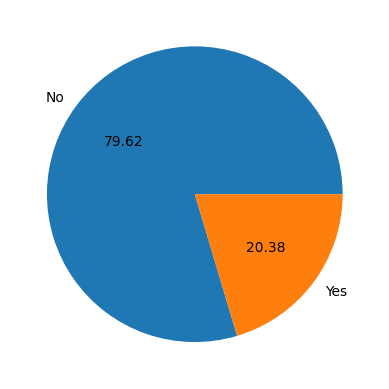

In [294]:
plt.pie(df["Exited"].value_counts(),labels=["No","Yes"],autopct="%.2f")

### As we can notice that the target variable is highly imbalanced so we need to balance it 

In [295]:
df_exited_0=df[df["Exited"]==0]
df_exited_1=df[df["Exited"]==1]
count_class_0,count_class_1 = len(df_exited_0),len(df_exited_1)
count_class_0,count_class_1

(7962, 2038)

In [296]:
df_exited_1_over=df_exited_1.sample(count_class_0,replace=True)

In [297]:
df_balanced=pd.concat([df_exited_0,df_exited_1_over],axis=0)

## Data Visualization

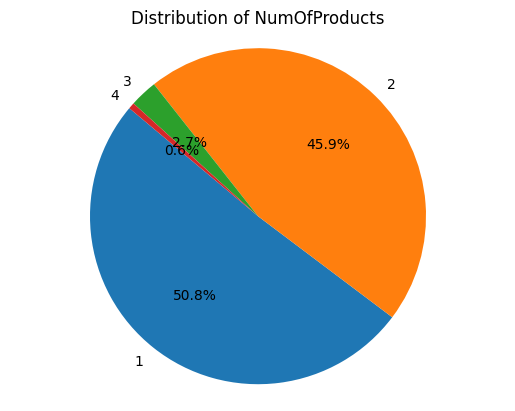

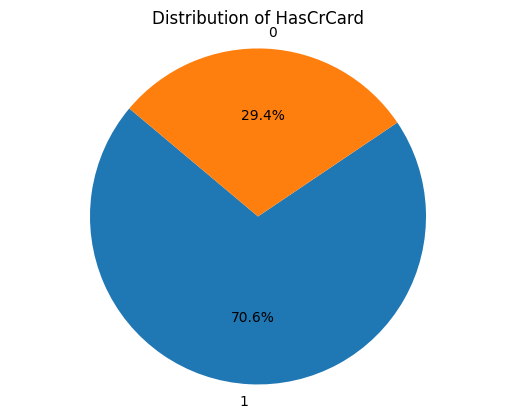

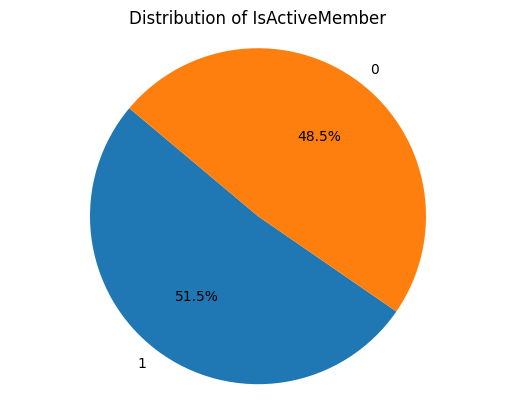

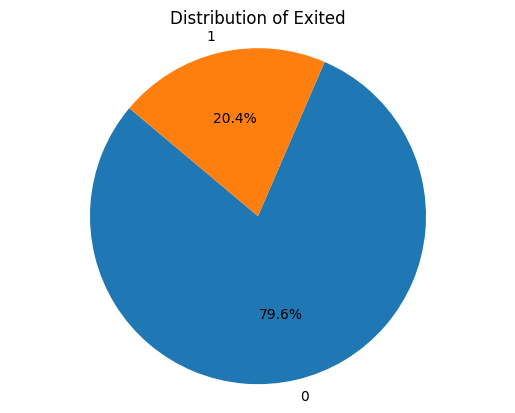

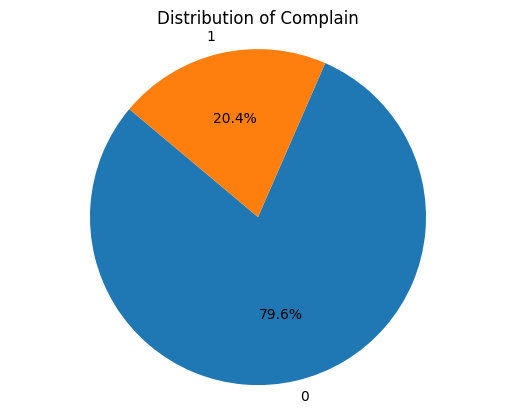

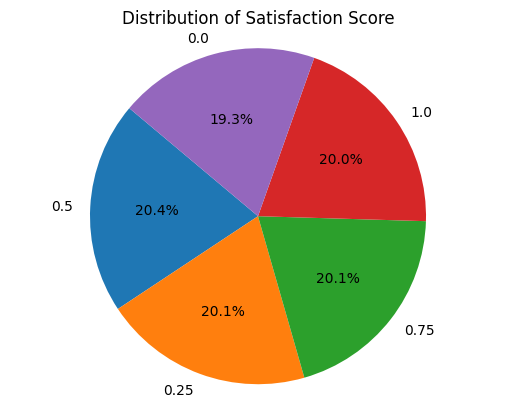

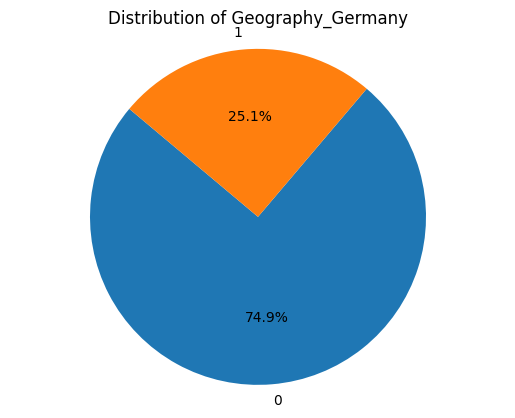

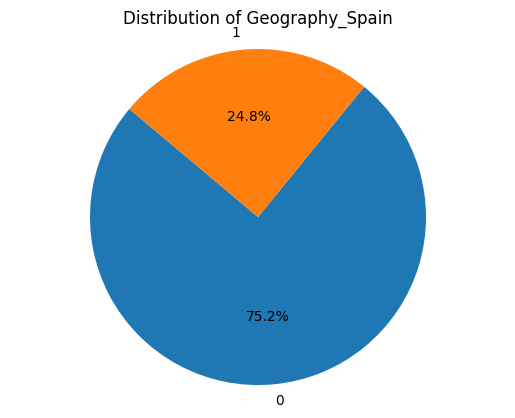

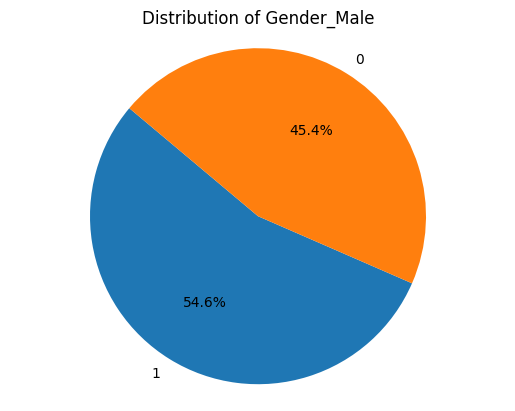

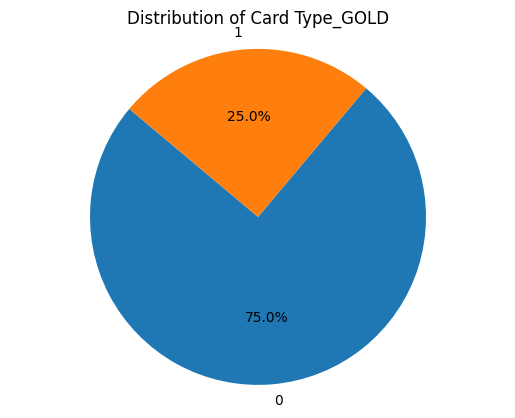

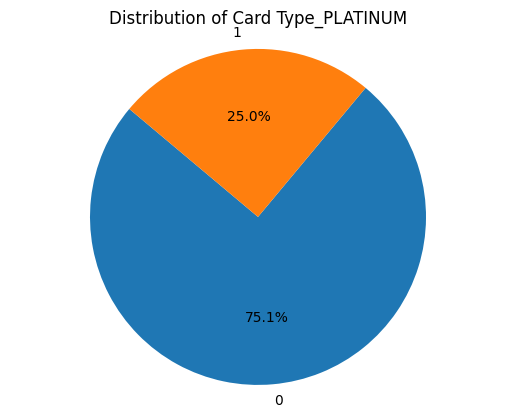

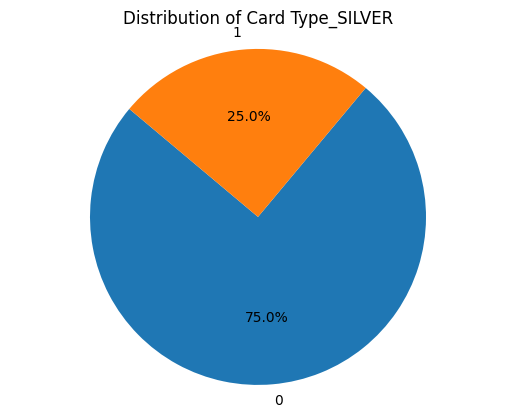

In [298]:
# Visualizaing the categorical columns
for column in df.columns:
    unique_values = df[column].value_counts()
    if df[column].nunique()<6:
        plt.figure()
        plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of {column}')
        plt.axis('equal')

# Display all the pie charts
plt.show()

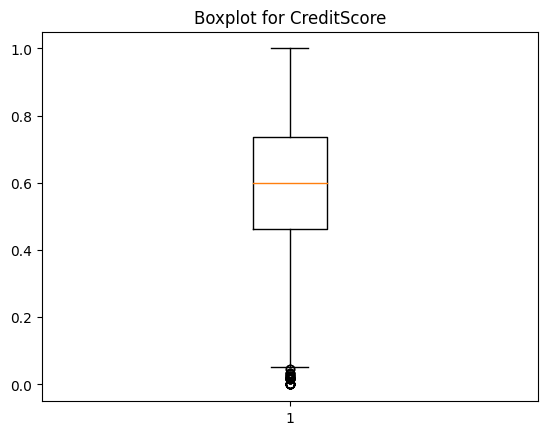

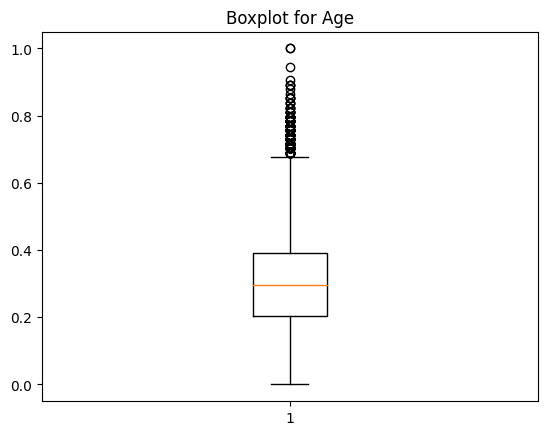

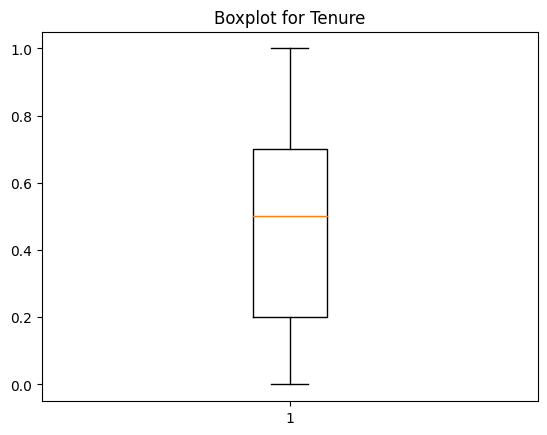

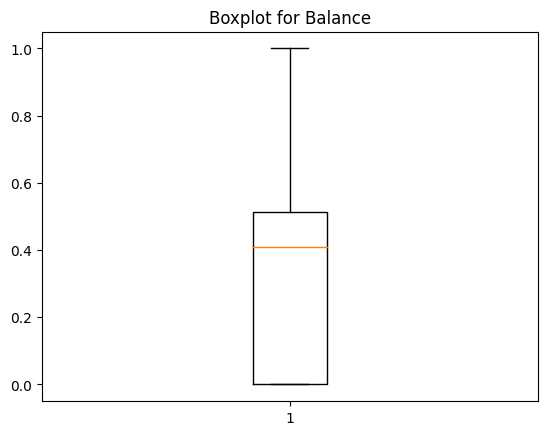

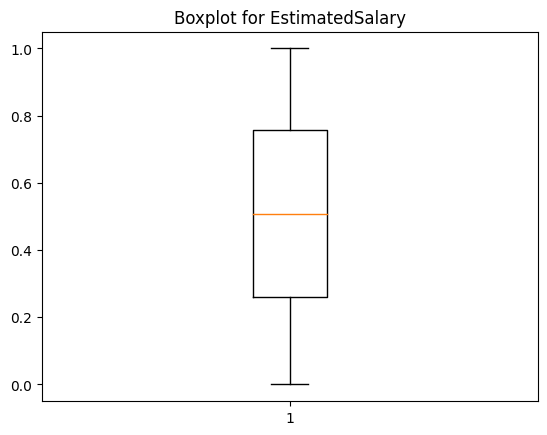

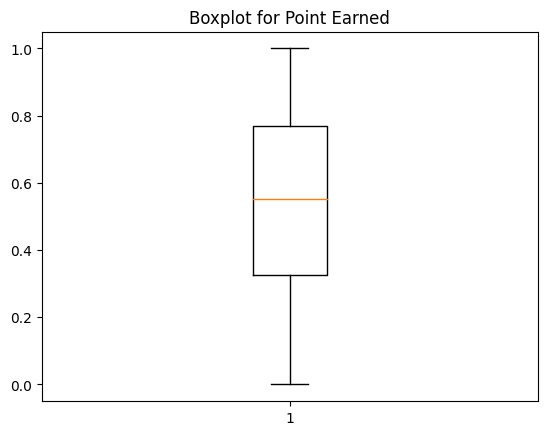

In [299]:
for column in df_balanced.columns:
    if df_balanced[column].nunique()>5:
        plt.figure() 
        plt.boxplot(df_balanced[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

In [300]:
def num_of_outliers(data, feature):
    Q1 = np.percentile(data[feature], 25, interpolation='midpoint')
    Q3 = np.percentile(data[feature], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Use logical masks to find the outliers
    upper_outliers = data[feature] > upper
    lower_outliers = data[feature] < lower

    # Count the number of outliers in the upper and lower tails
    num_upper_outliers = np.sum(upper_outliers)
    num_lower_outliers = np.sum(lower_outliers)

    return num_upper_outliers + num_lower_outliers


In [301]:
outlier_columns=[]
for column in df_balanced.columns:
    if df_balanced[column].nunique()>5:
        print(f"{column} column has {num_of_outliers(df_balanced,column)} outliers\n")
        if num_of_outliers(df_balanced,column)>0:
            outlier_columns.append(column)

CreditScore column has 46 outliers

Age column has 229 outliers

Tenure column has 0 outliers

Balance column has 0 outliers

EstimatedSalary column has 0 outliers

Point Earned column has 0 outliers



In [302]:
# import numpy as np

# def remove_outliers(data, feature):
#     # Make a copy of the data to avoid modifying the original DataFrame
#     data_copy = data.copy()
    
#     # Getting Q1 and Q3
#     Q1 = np.percentile(data_copy[feature], 25, interpolation='midpoint')
#     Q3 = np.percentile(data_copy[feature], 75, interpolation='midpoint')
    
#     # Inter-quartile range
#     IQR = Q3 - Q1 
    
#     # Upper and lower range
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
    
#     # Mark outliers with NaN values in the copy of the DataFrame
#     data_copy.loc[(data_copy[feature] < lower) | (data_copy[feature] > upper), feature] = np.nan
    
#     # Fill NaN values with the median of non-outlier data points
#     non_outlier_median = data_copy[feature].median()
#     data_copy[feature] = data_copy[feature].fillna(non_outlier_median)
    
#     print(f"Outliers removed for {feature} column")
    
#     return data_copy[feature]


In [303]:
def remove_outliers(data, feature):
    data_copy = data.copy()
    Q1 = np.percentile(data_copy[feature], 25, interpolation='midpoint')
    Q3 = np.percentile(data_copy[feature], 75, interpolation='midpoint')
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num_outliers_before = ((data_copy[feature] < lower) | (data_copy[feature] > upper)).sum()
    data_copy.loc[(data_copy[feature] < lower) | (data_copy[feature] > upper), feature] = np.nan
    
    non_outlier_median = data_copy[feature].median()
    data_copy[feature] = data_copy[feature].fillna(non_outlier_median)
    
    num_outliers_after = ((data_copy[feature] < lower) | (data_copy[feature] > upper)).sum()
    
    print(f"Outliers removed for {feature} column")
    print(f"Number of outliers removed: {num_outliers_before - num_outliers_after}")
    
    return data_copy[feature]


In [304]:
outlier_columns

['CreditScore', 'Age']

In [305]:
for column in outlier_columns:
    df_balanced[column]=remove_outliers(df_balanced,column)

Outliers removed for CreditScore column
Number of outliers removed: 46
Outliers removed for Age column
Number of outliers removed: 229


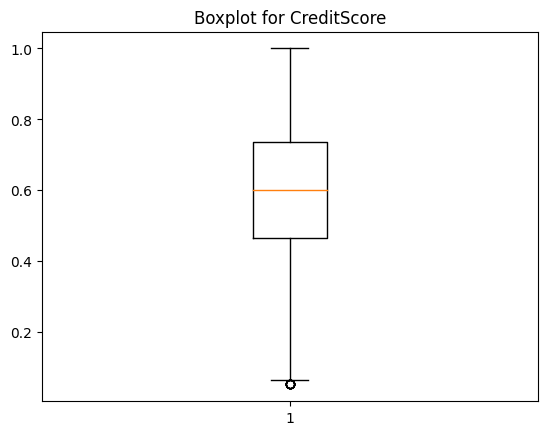

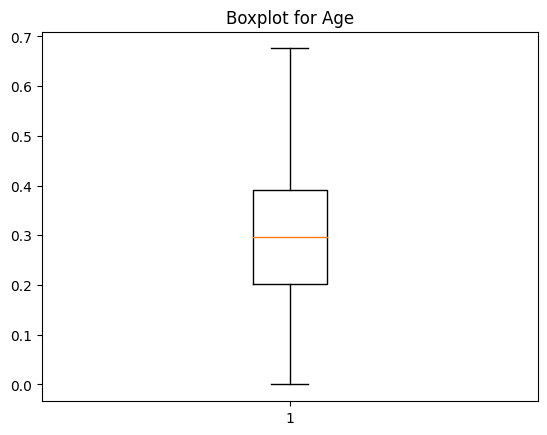

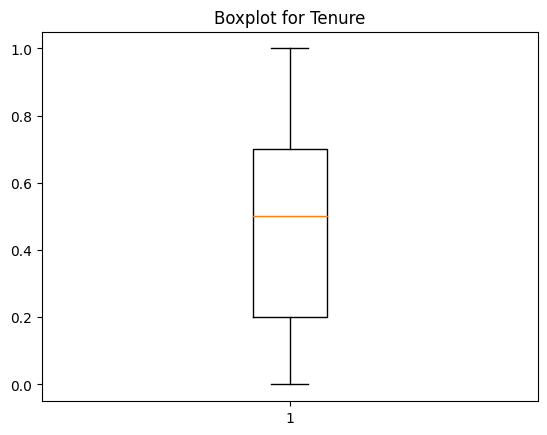

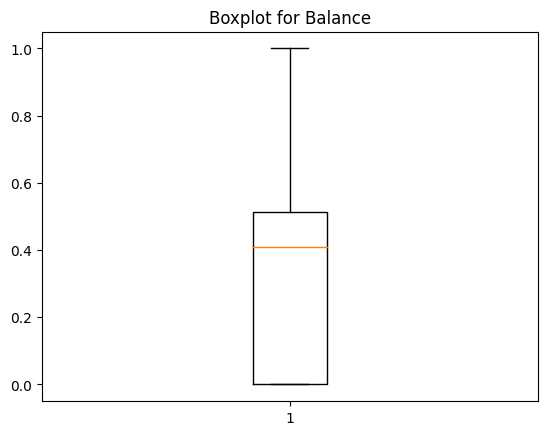

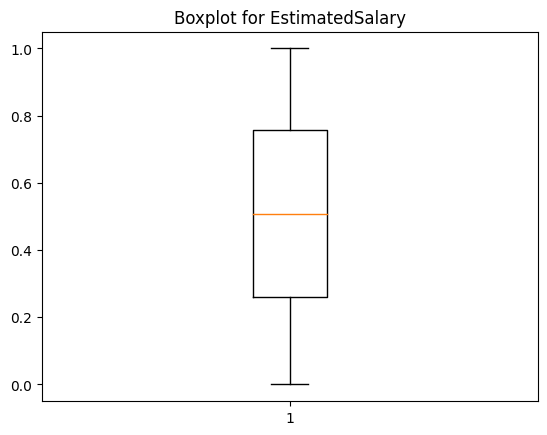

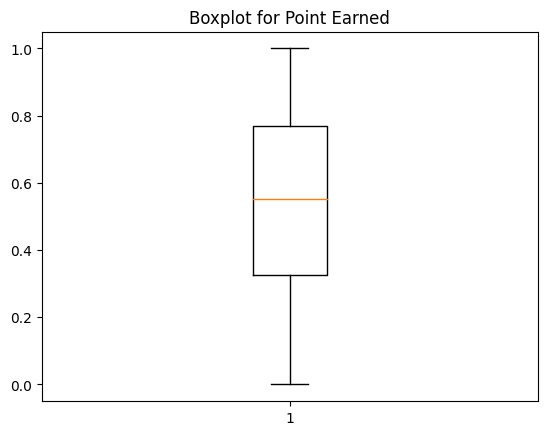

In [306]:
for column in df_balanced.columns:
    if df_balanced[column].nunique()>5:
        plt.figure() 
        plt.boxplot(df_balanced[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

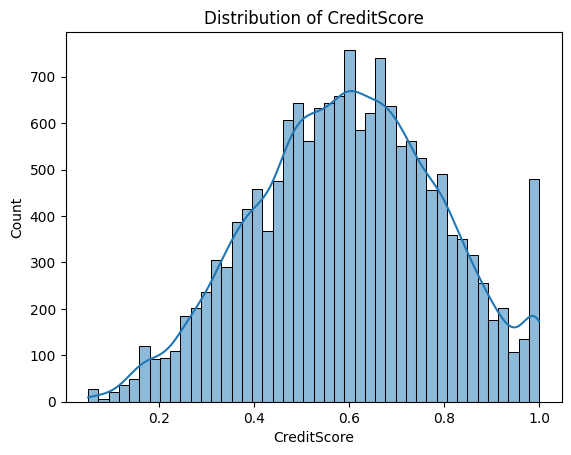

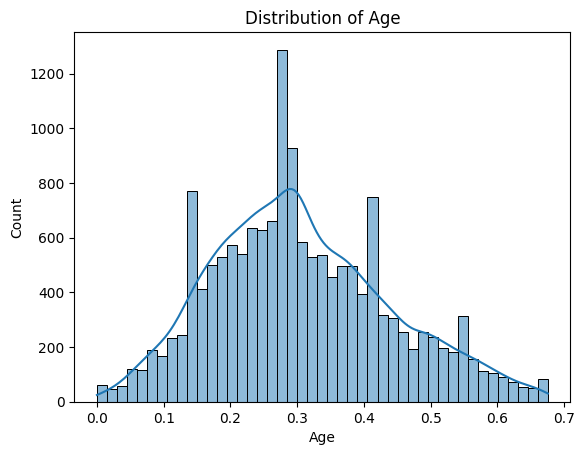

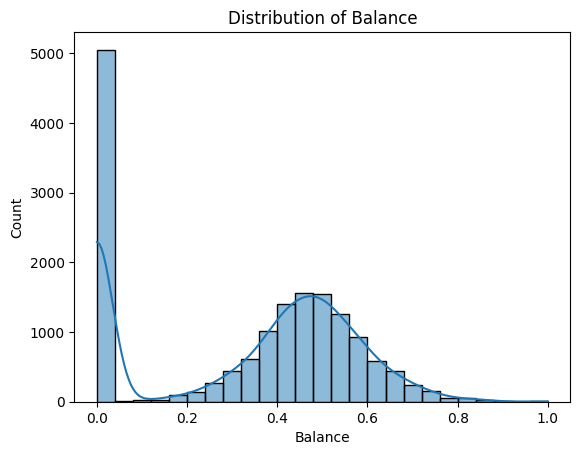

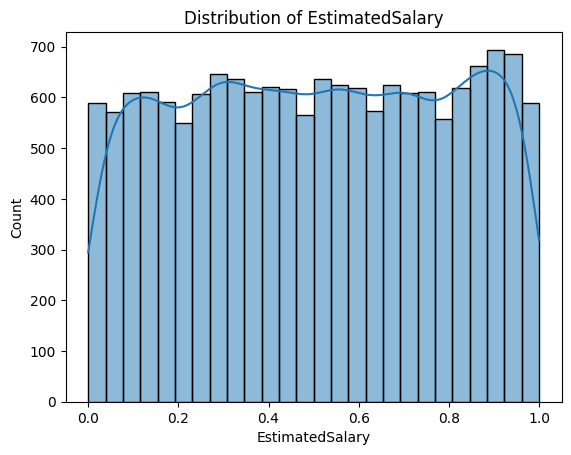

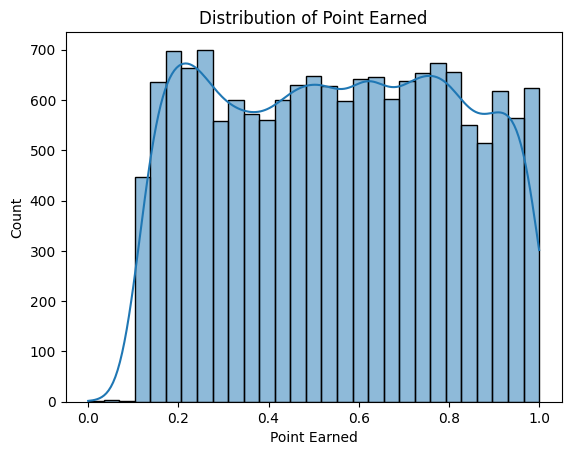

In [307]:
for column in df_balanced.columns:
    if df_balanced[column].nunique()>11:
        plt.figure()
        sns.histplot(df_balanced[column], kde=True)
        plt.title(f'Distribution of {column}')

# Display all the plots
plt.show()

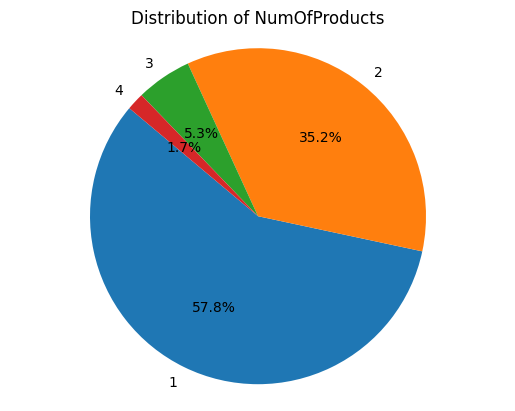

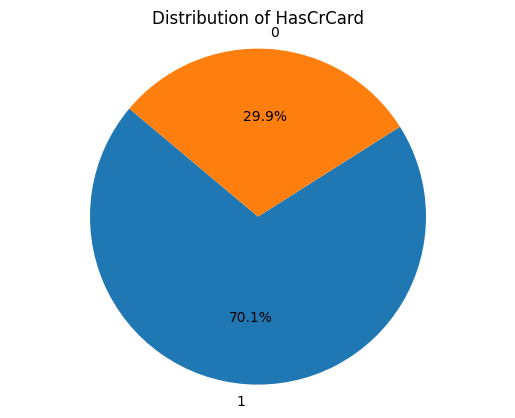

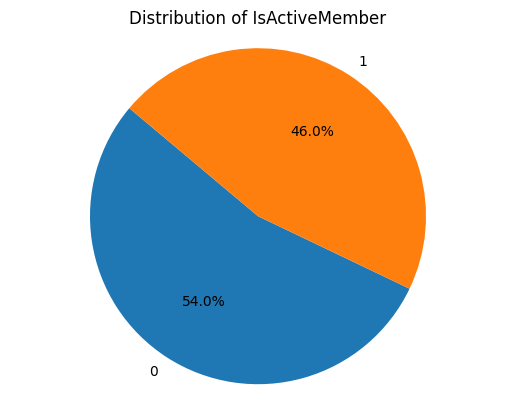

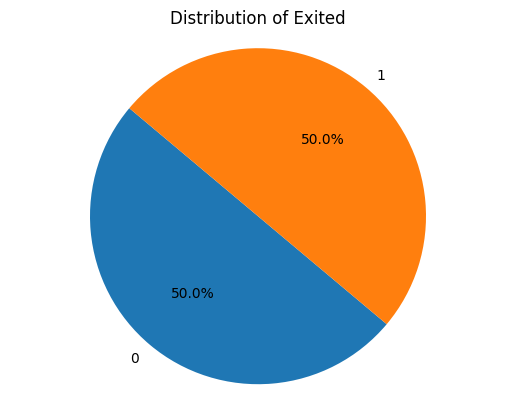

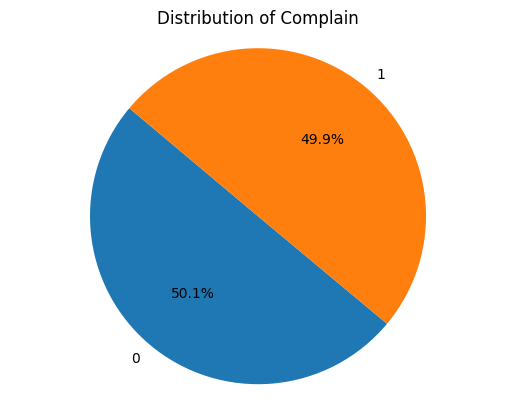

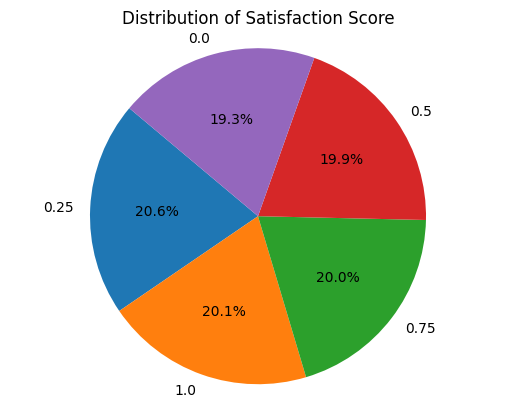

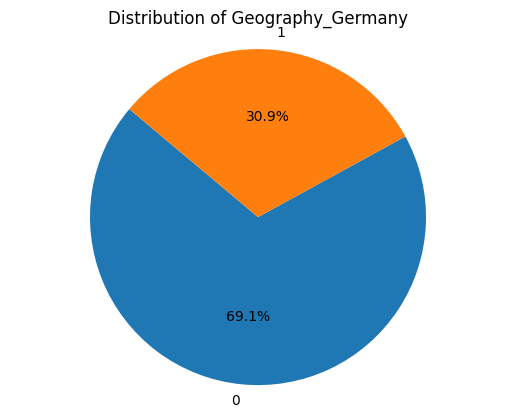

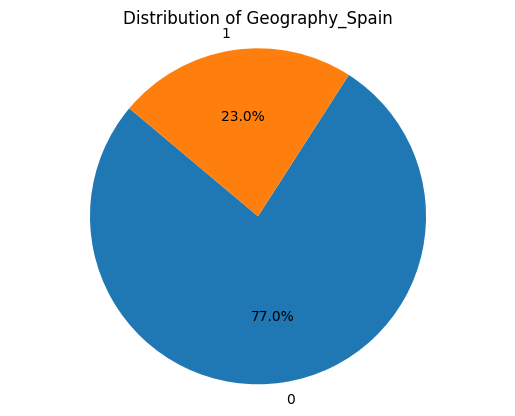

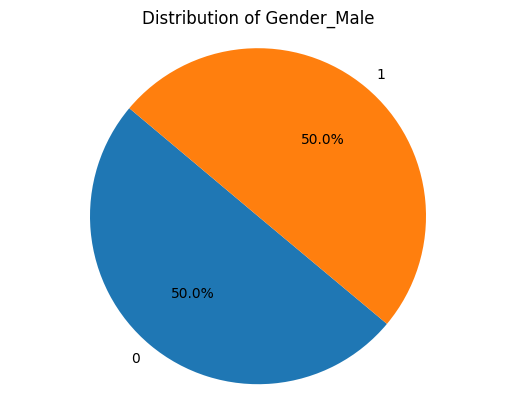

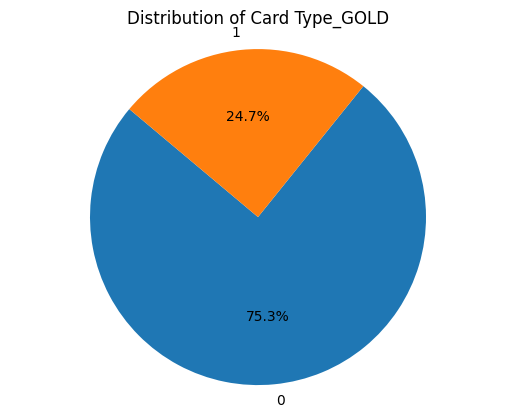

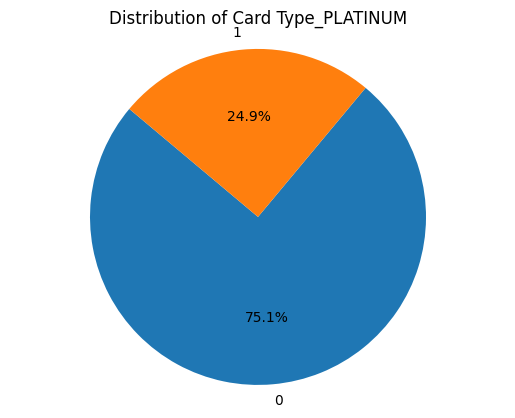

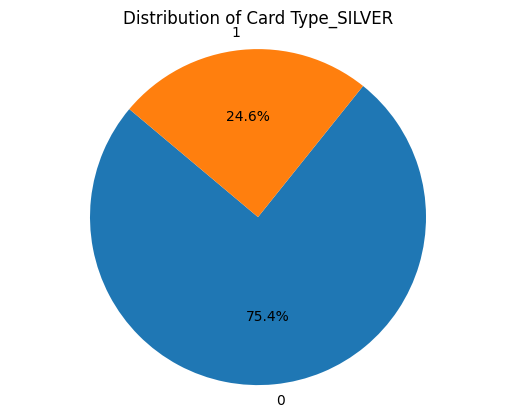

In [308]:
for column in df_balanced.columns:
    unique_values = df_balanced[column].value_counts()
    if df_balanced[column].nunique()<6:
        plt.figure()
        plt.pie(unique_values, labels=unique_values.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of {column}')
        plt.axis('equal')

# Display all the pie charts
plt.show()

## Splitting the data

In [309]:
# Splitting the data
X=df_balanced.drop(columns=["Exited"])
y=df_balanced["Exited"]

In [310]:
X.shape,y.shape

((15924, 17), (15924,))

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [312]:
len(X_train),len(X_test),len(y_train),len(y_test)

(12739, 3185, 12739, 3185)

## Model training

In [313]:
lr=LinearRegression()
reg=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test).round()
score=r2_score(y_test,y_pred)
print(f"Accuracy of the model is {score*100}")

Accuracy of the model is 99.24620915388456


In [314]:
from sklearn.metrics import confusion_matrix,f1_score

confusion_matrix(y_test,y_pred)

array([[1561,    2],
       [   4, 1618]])

In [316]:
f1_score(y_test,y_pred)

0.9981492905613819

## Saving the model

In [317]:
filename = 'finalized_model.sav'
filepath = f"/kaggle/working/{filename}"
pickle.dump(lr, open(filepath, 'wb'))
print(f"Model saved to {filepath} path")

Model saved to /kaggle/working/finalized_model.sav path


In [318]:
# Loading the model
loaded_model = pickle.load(open(filepath, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9925412996957101
